In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("D:/Topmentor_Python_Class/1000_companies_new.csv")

In [3]:
df

,Unnamed: 0,R_D_Spend,Administration,Marketing_Spend,Profit,State
0,0,165349.20,136897.800,471784.1000,192261.83000,New York
1,1,162597.70,151377.590,443898.5300,191792.06000,California
2,2,153441.51,101145.550,407934.5400,191050.39000,Florida
3,3,144372.41,118671.850,383199.6200,182901.99000,New York
4,4,142107.34,91391.770,366168.4200,166187.94000,Florida
...,...,...,...,...,...,...
995,995,54135.00,118451.999,173232.6695,95279.96251,California
996,996,134970.00,130390.080,329204.0228,164336.60550,California
997,997,100275.47,241926.310,227142.8200,413956.48000,California
998,998,128456.23,321652.140,281692.3200,333962.19000,California


In [4]:
df.isnull().sum()

Unnamed: 0         0
R_D_Spend          0
Administration     0
Marketing_Spend    0
Profit             0
State              0
dtype: int64

In [5]:
df.columns

Index(['Unnamed: 0', 'R_D_Spend', 'Administration', 'Marketing_Spend',
       'Profit', 'State'],
      dtype='object')

C:\Users\amant\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.016775458517277363
-1.2293497397191055


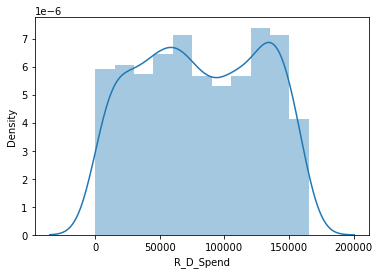

In [6]:
sns.distplot(df['R_D_Spend'])
print(df['R_D_Spend'].skew())
print(df['R_D_Spend'].kurt())

C:\Users\amant\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


6.173214409348265
93.25361034508374


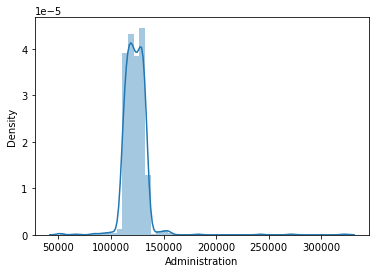

In [7]:
sns.distplot(df['Administration'])
print(df['Administration'].skew())
print(df['Administration'].kurt())

C:\Users\amant\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.05317511511005941
-1.092073346018352


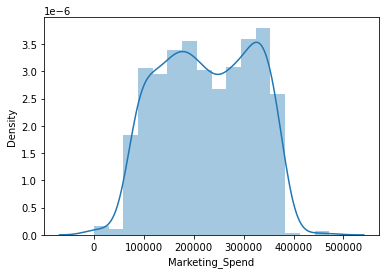

In [8]:
sns.distplot(df['Marketing_Spend'])
print(df['Marketing_Spend'].skew())
print(df['Marketing_Spend'].kurt())

In [9]:
corr_ = df.corr()

In [10]:
corr_

,Unnamed: 0,R_D_Spend,Administration,Marketing_Spend,Profit
Unnamed: 0,1.000000,-0.006275,0.055361,-0.011234,0.024356
R_D_Spend,-0.006275,1.000000,0.584483,0.975815,0.945018
Administration,0.055361,0.584483,1.000000,0.519006,0.745481
Marketing_Spend,-0.011234,0.975815,0.519006,1.000000,0.915081
Profit,0.024356,0.945018,0.745481,0.915081,1.000000


<AxesSubplot:>

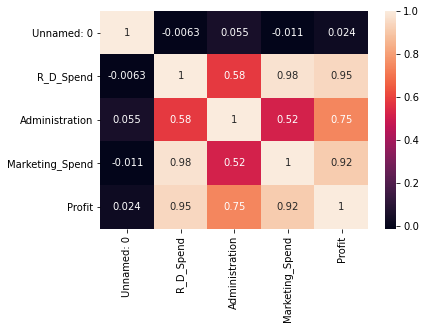

In [11]:
sns.heatmap(corr_, annot =True)

In [12]:
df.shape

(1000, 6)

In [13]:
X = df[["R_D_Spend", "Administration", "Marketing_Spend"]]
y = df["Profit"]
print(X)

     R_D_Spend  Administration  Marketing_Spend
0    165349.20      136897.800      471784.1000
1    162597.70      151377.590      443898.5300
2    153441.51      101145.550      407934.5400
3    144372.41      118671.850      383199.6200
4    142107.34       91391.770      366168.4200
..         ...             ...              ...
995   54135.00      118451.999      173232.6695
996  134970.00      130390.080      329204.0228
997  100275.47      241926.310      227142.8200
998  128456.23      321652.140      281692.3200
999  161181.72      270939.860      295442.1700

[1000 rows x 3 columns]


In [14]:
print(y)

0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, Length: 1000, dtype: float64


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 42)

In [17]:
X_train.shape, y_train.shape

((850, 3), (850,))

In [18]:
X_test.shape, y_test.shape

((150, 3), (150,))

In [19]:
X_train.head()

,R_D_Spend,Administration,Marketing_Spend
643,4187.0,111075.4508,76857.86711
158,91258.0,123934.4927,244861.59940
977,47438.0,117462.9555,160310.78970
429,96720.0,124741.1458,255400.54330
941,116989.0,127734.5640,294509.63420


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

## Training Phaase

In [22]:
model_train = model.fit(X_train, y_train)
model_train

LinearRegression()

In [23]:
print(model_train.coef_)
print(model_train.intercept_)

[0.51356162 1.19170348 0.08972324]
-89252.6509322707


In [24]:
model_train.score(X_train, y_train)

0.9465032330987562

In [25]:
R_D_Spend = 113478
Administration = 127216.0435
Marketing_Spend = 287735.1501

In [26]:
y1 = (0.53328102*R_D_Spend + 1.1225376*Administration + 0.08479815*Marketing_Spend - 81127.78277731)
y1

146592.08138068792

## Validation Phase

In [27]:
pred = model_train.predict(X_test)
pred

array([124525.81357684, 111386.34891248,  91304.04336809, 127128.51626474,
       161625.32613938,  91375.64570533, 154600.53055559, 138985.17710748,
        87551.3893959 ,  91070.25724709, 168071.26400764, 163367.9378179 ,
       104889.51296335, 107798.46681567,  91559.39633249, 159847.34458125,
       116451.13758624, 104218.3487644 , 120175.32313736, 105223.36985165,
        75221.9804854 , 125537.73612261,  64857.75431068,  69718.95079812,
       170363.4021732 , 164529.10380843, 178247.42606915, 135167.82237573,
       122149.99543226, 162407.7760502 , 145207.68109314, 113028.02713546,
       165776.53775942, 141494.71049557,  64881.04666767,  88555.54790511,
        81664.46756482,  73815.81366764, 116438.19748559, 170267.64490093,
        59997.42064051,  88617.66081137, 121365.82024618, 141768.17975286,
       168619.06521943, 147404.06198642, 152418.81528552, 138414.08353871,
       141602.54540962,  74090.14549399, 114136.56976988,  62181.72388484,
       171597.8958954 , 1

In [28]:
df1= pd.DataFrame({'Actual_Profit': y_test, 'Predicted_Profit': pred, 'Residuals' : (y_test - pred)})
df1

,Actual_Profit,Predicted_Profit,Residuals
521,124269.48590,124525.813577,-256.327677
737,111257.77400,111386.348912,-128.574912
740,91370.72519,91304.043368,66.681822
660,126846.88300,127128.516265,-281.633265
411,161008.28630,161625.326139,-617.039839
...,...,...,...
914,95148.40164,95118.810127,29.591513
810,152900.20690,153437.639290,-537.432390
244,53225.76119,52784.561060,441.200130
822,170464.43750,171174.320496,-709.882996


In [29]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

In [30]:
print(r2_score(y_test, pred))
print(mean_absolute_error(y_test, pred))
print(mean_squared_error(y_test, pred))

0.972128222560249
1684.163290664269
48671622.03163297


In [31]:
y_test

521    124269.48590
737    111257.77400
740     91370.72519
660    126846.88300
411    161008.28630
           ...     
914     95148.40164
810    152900.20690
244     53225.76119
822    170464.43750
321    169169.33180
Name: Profit, Length: 150, dtype: float64

In [32]:
pred_ = pd.DataFrame(pred, columns = ["pred"])
pred_

,pred
0,124525.813577
1,111386.348912
2,91304.043368
3,127128.516265
4,161625.326139
...,...
145,95118.810127
146,153437.639290
147,52784.561060
148,171174.320496


In [33]:
def model_selection(X,y,t_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state = 1)
    X_train.shape
    X_train.head()
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model_train = model.fit(X_train, y_train)
    model_score = model_train.score(X_train, y_train)
    return model_score, X_train.shape

In [34]:
print(model_selection(X, y, 0.15))

(0.9624409536748895, (850, 3))
